## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [1]:
import util
import matplotlib
import random
import math
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [2]:
def recursive_fib(n):
    if n <= 1:
        return n
    return recursive_fib(n-1) + recursive_fib(n-2)

Проверьте, что функция работает корректно:

In [3]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [4]:
def recursive_fib_with_cache(n, cache=None):
    fib = [0,1] + [0]*(n-1)
    for i in range(2, n+1):
        fib[i] = fib[i-1] + fib[i-2]
    return fib[n]

Убедитесь, что функция работает корректно:

In [5]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [6]:
def fib(n):
    fib1=fib2=1
    i = 2
    fib_sum = 0
    while i < n:
        fib_sum = fib2 + fib1
        fib1 = fib2
        fib2 = fib_sum
        i += 1
    return fib_sum;

Проверьте правильность реализации:

In [7]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

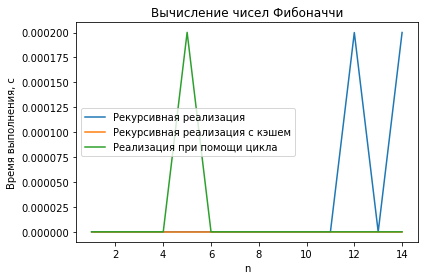

In [8]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [9]:
def bubble_sort(a):
    for i in range(1, len(a)):
        for k in range (0, len(a) - i):
            if a[k] > a[k+1]:
                a[k], a[k+1] = a[k+1], a[k]

Убедитесь, что сортировка написана верно:

In [10]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [11]:
def bubble_sort_adaptive(a):
    j = len(a) - 1
    IsNotOrdered = True
    while IsNotOrdered:
        IsNotOrdered = False
        for i in range(0, j):
            if a[i] > a[i + 1]:
                a[i], a[i + 1] = a[i + 1], a[i]
                IsNotOrdered = True
        j -= 1

Проверьте свою реализацию:

In [12]:
 a = [5, 4, 3, 2, 1]
bubble_sort_adaptive(a)
assert util.is_sorted(a)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

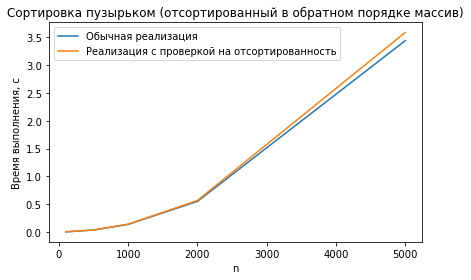

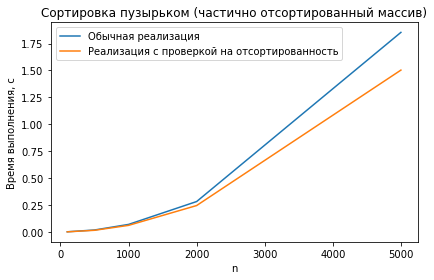

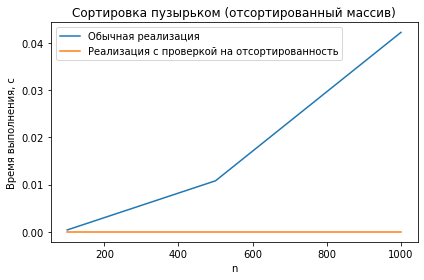

In [13]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [14]:
def quick_sort_first(A):
    if len(A) <= 1:
        return
    barrier = A[0]
    L = []
    M = []
    R = []
    for x in A:
        if x < barrier:
            L.append(x)
        elif x == barrier:
            M.append(x)
        else:
            R.append(x)

    quick_sort_first(L)
    quick_sort_first(R)

    k = 0
    for x in L + M + R:
        A[k] = x
        k += 1

Проверьте свою реализацию:

In [15]:
a = [5, 4, 3, 2, 1]
quick_sort_first(a)
assert util.is_sorted(a)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [16]:
def quick_sort_middle(A):
    if len(A) <= 1:
        return
    barrier = A[len(A)//2]
    L = []
    M = []
    R = []
    for x in A:
        if x < barrier:
            L.append(x)
        elif x == barrier:
            M.append(x)
        else:
            R.append(x)

    quick_sort_middle(L)
    quick_sort_middle(R)

    k = 0
    for x in L + M + R:
        A[k] = x
        k += 1

Проверяем реализацию:

In [17]:
a = [5, 4, 3, 2, 1]
quick_sort_middle(a)
assert util.is_sorted(a)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [18]:
def quick_sort_random(A):
    if len(A) <= 1:
        return
    barrier = random.choice(A)
    L = []
    M = []
    R = []
    for x in A:
        if x < barrier:
            L.append(x)
        elif x == barrier:
            M.append(x)
        else:
            R.append(x)

    quick_sort_random(L)
    quick_sort_random(R)

    k = 0
    for x in L + M + R:
        A[k] = x
        k += 1

Проверяем реализацию:

In [19]:
a = [5, 4, 3, 2, 1]
quick_sort_random(a)
assert util.is_sorted(a)

Сравним скорости работы трёх реализаций на различных входных данных:

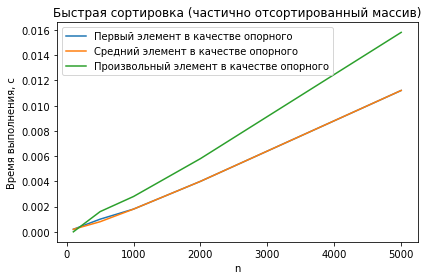

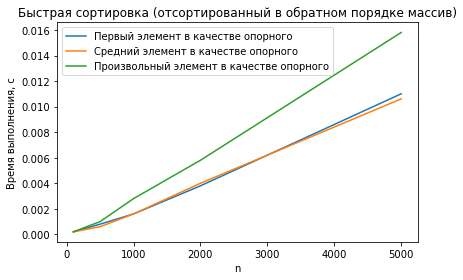

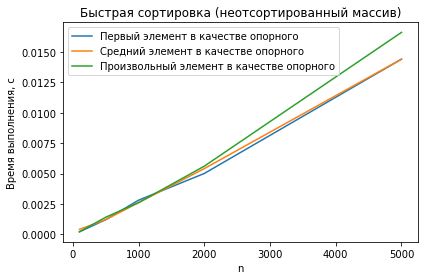

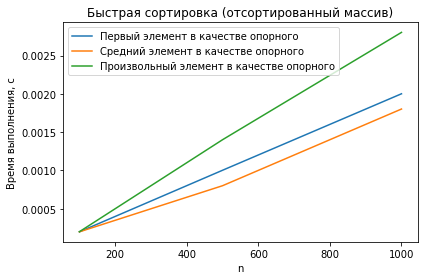

In [30]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [21]:
def merge(a, b):
    c = [0] * (len(a) + len(b))
    i = k = n = 0
    while i < len(a) and k < len(b):
        if a[i] <= b [k]:
            c[n] = a[i]
            i += 1
            n += 1
        else:
            c[n] = b[k]
            k += 1
            n += 1
    while i < len(a):
        c[n] = a[i]
        i += 1
        n += 1
    while k < len(b):
        c[n] = b[k]
        k += 1
        n += 1
    return c
def merge_sort(a):
    if len(a) <= 1:
        return
    middle = len(a) // 2
    L = [a[i] for i in range(0, middle)]
    R = [a[i] for i in range(middle, len(a))]
    merge_sort(L)
    merge_sort(R)
    c = merge(L, R)
    for i in range(len(a)):
        a[i] = c[i]

Проверьте корректность реализации:

In [22]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

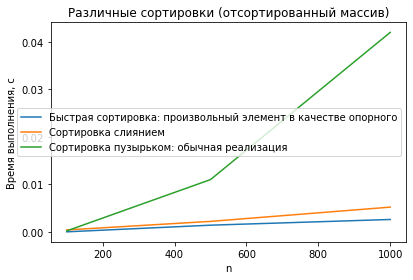

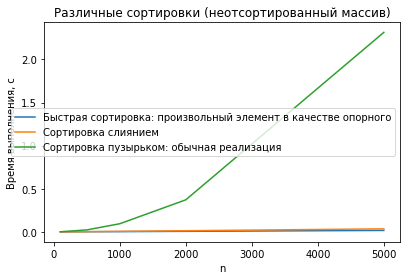

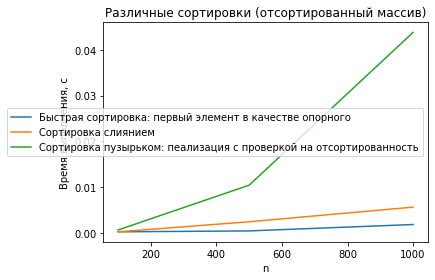

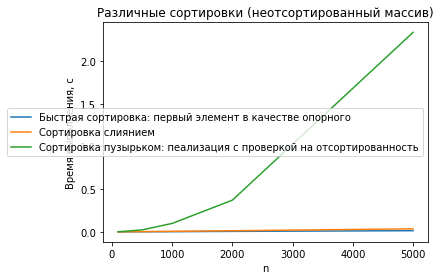

In [23]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [24]:
def search(a, x):
    for i in range (len(a)):
        if a[i] == x:
            return i

Проверьте корректность реализации:

In [25]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [33]:
def binary_search(a, x):
    left = -1 
    right = len(a) 
    while right > left + 1: 
        middle = (left + right) // 2 
        if a[middle] >= x: 
            right = middle 
        else: 
            left = middle 
    return right

Проверьте корректность реализации:

In [34]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [35]:
def interpolation_search(a, x):
    low = 0
    high = (len(a) - 1)
    while low <= high and x >= a[low] and x <= a[high]:
        index = low + int(((float(high - low) / ( a[high] - a[low])) * ( x - a[low])))
        if a[index] == x:
            return index
        if a[index] < x:
            low = index + 1;
        else:
            high = index - 1;
    return -1

Проверьте свою реализацию:

In [36]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

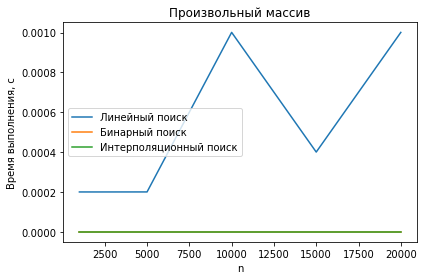

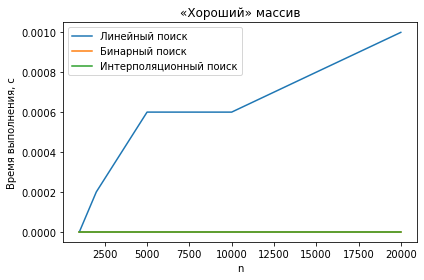

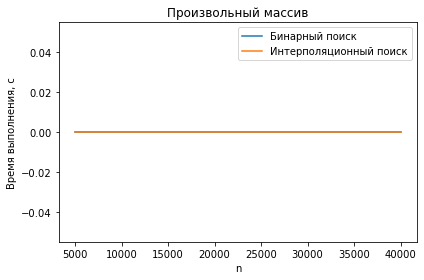

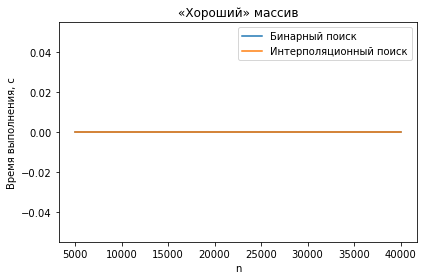

In [37]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.